In [36]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [43]:
merged_path = "C:/Users/ozgur/Desktop/dev/Fantasy-Basketball-Player-Recomendation-System/ML/main_merged5v2.csv"
merged_df = pd.read_csv(merged_path, index_col=None, header=0)
merged_df.drop(['Pos', 'Date', 'STL_AVG', 'BLK Last Week',
       'USG_perc', 'DRtg', 'ORtg', 'AST_perc', 'DRB_perc', 'ORB_perc', 'Starter', 'MP Last Month',
       'BLK_perc', 'TOV_perc', 'STL_perc', 'eFG_perc', 'MP', 'FG', 'FGA', 'MP Last Week', 'PTS_AVG Last Week',
               'FG_perc', '3P', '3PA', '3P_perc', 'FT', 'FTA', 'BLK Last Month', 'TRB_AVG', 'PTS_AVG', '3PA_AVG',
       'FT_perc', 'TRB', 'STL', 'BLK', 'TOV', 'PF', 'W', 'BLK_AVG', 'FGA_AVG', 'FG_perc_AVG', 'FG_AVG Last Week',
       'FGA_AVG Last Week', 'FG_perc_AVG Last Week', 'FG_AVG Last Month', 'ORtg Last Month', 'TOV_AVG', 
       'FGA_AVG Last Month', 'FG_perc_AVG Last Month', 'AST Last Month', 'AST Last Week', 'AST_AVG', 'AST'], axis=1, inplace=True)

In [44]:
print(merged_df.columns)
print(merged_df.dtypes)
print(merged_df.shape)

Index(['Name', 'Team', 'Home', 'PTS', 'PG', 'SG', 'F', 'C',
       'PTS_AVG Last Month', 'MP_AVG', 'FG_AVG', 'Opp', 'ORtg_AVG',
       'eFG_perc_AVG', 'DRtg_AVG', 'USG_perc_AVG', '3P_AVG'],
      dtype='object')
Name                   object
Team                   object
Home                    int64
PTS                     int64
PG                      int64
SG                      int64
F                       int64
C                       int64
PTS_AVG Last Month    float64
MP_AVG                float64
FG_AVG                float64
Opp                    object
ORtg_AVG              float64
eFG_perc_AVG          float64
DRtg_AVG              float64
USG_perc_AVG          float64
3P_AVG                float64
dtype: object
(28911, 17)


In [ ]:
# temp_path = "C:/Users/ozgur/Desktop/dev/Fantasy-Basketball-Player-Recomendation-System/ML/data/Merged/df_2018-19.csv"
# temp_df = pd.read_csv(temp_path, index_col=None, header=0)
# merged_df['Opp'] = np.nan

# for index, row in temp_df.iterrows():
#     if row['W'] == row['Team']:
#         merged_df.loc[index, ['Opp']] = row['L']
#     else:
#         merged_df.loc[index, ['Opp']] = row['W']
        
# merged_df

In [45]:
merged_df['Team'] = pd.Categorical(merged_df['Team'])
merged_df['Opp'] = pd.Categorical(merged_df['Opp'])
dummies_team = pd.get_dummies(merged_df['Team'], prefix = 'Team')
dummies_opp = pd.get_dummies(merged_df['Opp'], prefix = 'Opp')
merged_df = pd.concat([merged_df, dummies_team], axis=1)
merged_df = pd.concat([merged_df, dummies_opp], axis=1)

In [ ]:
merged_df['Name'] = pd.Categorical(merged_df['Name'])
# dummies_name = pd.get_dummies(merged_df['Name'], prefix = '')
# merged_df = pd.concat([merged_df, dummies_name], axis=1)
# merged_df

In [58]:
train = merged_df.loc[1609:17000]
test = merged_df.loc[17000:17500]
X_train = train.drop(['PTS', 'Name', 'Team', 'Opp'], 1)
y_train = train[['PTS']]
X_test = test.drop(['PTS', 'Name', 'Team', 'Opp'], 1)
y_test = test[['PTS']]

In [59]:
steps = [('scaler', StandardScaler()), ('regression', LinearRegression())]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
# y_pred[y_pred < 0] = 0
# y_pred[y_pred > 100] = 0
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred), rmse)

31.333740279030174 0.5869545892807947 5.597654891026257


In [6]:
lm = LinearRegression()
lm.fit(X_train, y_train)
# r_squared = lm.score(X_test, y_test)
y_pred = lm.predict(X_test)
# y_pred[y_pred < 0] = 0
# y_pred[y_pred > 100] = 0
print(mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))

32.444136507978804 0.622782581604377


In [ ]:
# svr = svm.SVR(kernel='sigmoid', epsilon=0.2, gamma=0.4, C=1)
# svr.fit(X_train, y_train)
# y_pred = svr.predict(X_test)
# print(mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred))

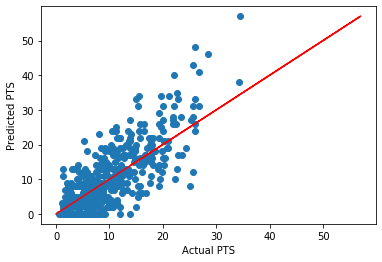

In [24]:
plt.scatter(y_pred, y_test)
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual PTS")
plt.ylabel("Predicted PTS")
plt.show()
# 34.09 0.60 5.83
# 33.89 0.60 5.82
# 32.35 0.62 5.68